In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.52801177,  0.06557624, -0.43360756, -0.09970591, -0.26022697,
        -0.41749787, -0.66630313,  0.76226325, -0.02158021, -0.86507668],
       [-0.14439598, -0.93252826, -0.14794541, -0.06086742,  0.09540373,
         0.90676114,  0.40781282,  0.12607614,  0.31778011, -0.29202433]])

In [4]:
test_Features[:2]

array([[-0.04999214, -0.5065345 , -0.3197659 , -0.64344477, -0.74435528,
        -0.23335479, -0.63970249,  0.40967583, -0.38052069, -1.40003847],
       [ 0.82498724, -0.00319784,  0.77886959, -1.16202067, -1.16242497,
         0.24544492,  1.31879152,  0.15906234, -0.58766599,  0.44153689]])

In [5]:
train_Label[:4]

array([1, 0, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 1, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=10*4,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=10*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=10*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,511
Trainable params: 2,511
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 1s - loss: 0.6894 - acc: 0.6475 - val_loss: 0.6816 - val_acc: 0.6557
Epoch 2/30
 - 0s - loss: 0.6391 - acc: 0.6474 - val_loss: 0.5479 - val_acc: 0.6557
Epoch 3/30
 - 0s - loss: 0.5075 - acc: 0.7244 - val_loss: 0.4782 - val_acc: 0.7970
Epoch 4/30
 - 0s - loss: 0.4492 - acc: 0.8095 - val_loss: 0.4238 - val_acc: 0.8055
Epoch 5/30
 - 0s - loss: 0.3990 - acc: 0.8236 - val_loss: 0.4044 - val_acc: 0.8200
Epoch 6/30
 - 0s - loss: 0.3837 - acc: 0.8344 - val_loss: 0.4003 - val_acc: 0.8233
Epoch 7/30
 - 0s - loss: 0.3718 - acc: 0.8424 - val_loss: 0.3922 - val_acc: 0.8338
Epoch 8/30
 - 0s - loss: 0.3633 - acc: 0.8491 - val_loss: 0.3857 - val_acc: 0.8410
Epoch 9/30
 - 0s - loss: 0.3561 - acc: 0.8538 - val_loss: 0.3813 - val_acc: 0.8443
Epoch 10/30
 - 0s - loss: 0.3509 - acc: 0.8577 - val_loss: 0.3760 - val_acc: 0.8449
Epoch 11/30
 - 0s - loss: 0.3461 - acc: 0.8583 - val_loss: 0.3717 - val_acc: 0.8528
Epoch 12/30
 - 0s - loss: 0.3438 - a

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

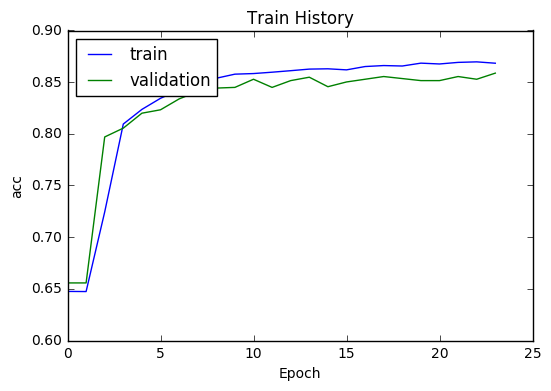

In [19]:
show_train_history(train_history,'acc','val_acc')

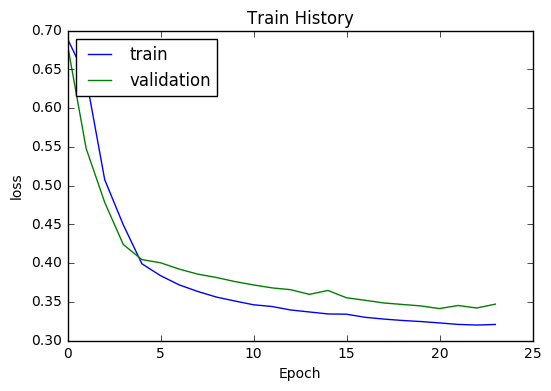

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 55us/step


In [22]:
scores[1]

0.8711882227352115